# Part 4. Segmenting and Clustering Neighborhoods in the City of Toronto

**Exploring and Clustering Neighborhoods**


- *Installing necessary tools*

In [21]:
# Install if needed
#      !conda install -c conda-forge geopy --yes
#      !conda install -c conda-forge folium=0.5.0 --yes

In [22]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data anlysis

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert and address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # transform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported')

Libraries imported


- *Define Foursquare Credentials and Version*

- *Import Newly Created Dataframe from Part 2*

In [24]:
tn_csv = "Toronto_Neighbourhoods.csv"

In [25]:
TorontoNeighborhoods = pd.read_csv(tn_csv)

- *Examining the resulting dataframe*

In [26]:
print(TorontoNeighborhoods.shape)
TorontoNeighborhoods.head()


(103, 5)


Postal Code      Borough                            Neighborhood   Latitude  \
0         M1B  Scarborough                          Rouge, Malvern  43.806686   
1         M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2         M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3         M1G  Scarborough                                  Woburn  43.770992   
4         M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [27]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(TorontoNeighborhoods['Borough'].unique()),
        TorontoNeighborhoods.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


**Using geopy library to get the geographic coordinates of Toronto**


In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent toronto_explorer, as shown below.

In [28]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Toronto is {}, {}.'.format(latitude,longitude))

The geographical coordinate of Toronto is 43.653963, -79.387207.


**Creating a map of Toronto with Neighbourhoods Superimposed on Top**

In [29]:
# create map of Toronto using the geographic coordinates
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(TorontoNeighborhoods['Latitude'], TorontoNeighborhoods['Longitude'], TorontoNeighborhoods.Borough, TorontoNeighborhoods.Neighborhood):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#87cefa',
        fill_opacity=0.5,
        parse_html=False).add_to(map_toronto)

In [30]:
map_toronto

In [31]:
# map_toronto.save('map_toronto.html')

[Click here to view image of the map](https://photos.app.goo.gl/PNjhEAFaynh1D7LY7 "Screen shot only")

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, let's simplify the above map and segment and cluster only the neighborhoods in East, West, and Central Toronto only. So let's slice the original dataframe and create a new dataframe where Boroughs contain a text Toronto.

In [32]:
toronto_data = TorontoNeighborhoods[TorontoNeighborhoods['Borough'].str.contains("Toronto")].reset_index(drop=True)
print(toronto_data.shape)
toronto_data

(39, 5)


Postal Code           Borough  \
0          M4E      East Toronto   
1          M4K      East Toronto   
2          M4L      East Toronto   
3          M4M      East Toronto   
4          M4N   Central Toronto   
5          M4P   Central Toronto   
6          M4R   Central Toronto   
7          M4S   Central Toronto   
8          M4T   Central Toronto   
9          M4V   Central Toronto   
10         M4W  Downtown Toronto   
11         M4X  Downtown Toronto   
12         M4Y  Downtown Toronto   
13         M5A  Downtown Toronto   
14         M5B  Downtown Toronto   
15         M5C  Downtown Toronto   
16         M5E  Downtown Toronto   
17         M5G  Downtown Toronto   
18         M5H  Downtown Toronto   
19         M5J  Downtown Toronto   
20         M5K  Downtown Toronto   
21         M5L  Downtown Toronto   
22         M5N   Central Toronto   
23         M5P   Central Toronto   
24         M5R   Central Toronto   
25         M5S  Downtown Toronto   
26         M5T  Downtown Toronto   
27         M5V  Downtown Toronto   
28         M5W  Downtown Toronto   
29         M5X  Downtown Toronto   
30         M6G  Downtown Toronto   
31         M6H      West Toronto   
32         M6J      West Toronto   
33         M6K      West Toronto   
34         M6P      West Toronto   
35         M6R      West Toronto   
36         M6S      West Toronto   
37         M7A  Downtown Toronto   
38         M7Y      East Toronto   

                                         Neighborhood   Latitude  Longitude  
0                                         The Beaches  43.676357 -79.293031  
1                        The Danforth West, Riverdale  43.679557 -79.352188  
2                      The Beaches West, India Bazaar  43.668999 -79.315572  
3                                     Studio District  43.659526 -79.340923  
4                                       Lawrence Park  43.728020 -79.388790  
5                                    Davisville North  43.712751 -79.390197  
6                                  North Toronto West  43.715383 -79.405678  
7                                          Davisville  43.704324 -79.388790  
8                         Moore Park, Summerhill East  43.689574 -79.383160  
9   Deer Park, Forest Hill SE, Rathnelly, South Hi...  43.686412 -79.400049  
10                                           Rosedale  43.679563 -79.377529  
11                        Cabbagetown, St. James Town  43.667967 -79.367675  
12                               Church and Wellesley  43.665860 -79.383160  
13                                       Harbourfront  43.654260 -79.360636  
14                           Ryerson, Garden District  43.657162 -79.378937  
15                                     St. James Town  43.651494 -79.375418  
16                                        Berczy Park  43.644771 -79.373306  
17                                 Central Bay Street  43.657952 -79.387383  
18                           Adelaide, King, Richmond  43.650571 -79.384568  
19  Harbourfront East, Toronto Islands, Union Station  43.640816 -79.381752  
20           Design Exchange, Toronto Dominion Centre  43.647177 -79.381576  
21                     Commerce Court, Victoria Hotel  43.648198 -79.379817  
22                                           Roselawn  43.711695 -79.416936  
23                Forest Hill North, Forest Hill West  43.696948 -79.411307  
24                The Annex, North Midtown, Yorkville  43.672710 -79.405678  
25                     Harbord, University of Toronto  43.662696 -79.400049  
26          Chinatown, Grange Park, Kensington Market  43.653206 -79.400049  
27  CN Tower, Bathurst Quay, Island airport, Harbo...  43.628947 -79.394420  
28                    Stn A PO Boxes 25 The Esplanade  43.646435 -79.374846  
29             First Canadian Place, Underground city  43.648429 -79.382280  
30                                           Christie  43.669542 -79.422564  
31                       Dovercourt Village, Dufferin  43.669005 -

**Re-create the map with new markers for Toronto Neighborhoods**

In [33]:
# I will be using the same coordinates for the previous view
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data.Borough, toronto_data.Neighborhood):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

[Click here to view image of the map](https://photos.app.goo.gl/hcPBxU4pvoPMZYNY9 "Screen shot only")

**Utilizing the Foursquare API for Exploration and Segmentation of the Neighborhoods**

- **Exploring Neighborhood of Toronto**


In [34]:
# ---------------------------------------------
# The following function retrieves the venues given the names and coordinates and stores it into dataframe.
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**Retrieving all venues given the Address**

In [35]:
Toronto_Neighborhoods = toronto_data
toronto_venues = getNearbyVenues(names=Toronto_Neighborhoods['Neighborhood'],
                                latitudes=Toronto_Neighborhoods['Latitude'],
                                longitudes=Toronto_Neighborhoods['Longitude']
                                )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction Sout

*Total size of resulting dataframe*

In [36]:
print(toronto_venues.shape)
toronto_venues.head()

(860, 7)


Neighbourhood  Neighborhood Latitude  \
0                   The Beaches              43.676357   
1                   The Beaches              43.676357   
2                   The Beaches              43.676357   
3                   The Beaches              43.676357   
4  The Danforth West, Riverdale              43.679557   

   Neighborhood Longitude                               Venue  Venue Latitude  \
0              -79.293031                   Glen Manor Ravine       43.676821   
1              -79.293031  The Big Carrot Natural Food Market       43.678879   
2              -79.293031                 Grover Pub and Grub       43.679181   
3              -79.293031                       Upper Beaches       43.680563   
4              -79.352188                            Pantheon       43.677621   

   Venue Longitude     Venue Category  
0       -79.293942              Trail  
1       -79.297734  Health Food Store  
2       -79.297215                Pub  
3       -79.292869       Neighborhood  
4       -79.351434   Greek Restaurant

**Total venues returned for each Neighborhood**

In [37]:
toronto_venues.groupby('Neighbourhood').count()

Neighborhood Latitude  \
Neighbourhood                                                               
Adelaide, King, Richmond                                               30   
Berczy Park                                                            30   
Brockton, Exhibition Place, Parkdale Village                           23   
Business Reply Mail Processing Centre 969 Eastern                      15   
CN Tower, Bathurst Quay, Island airport, Harbou...                     17   
Cabbagetown, St. James Town                                            30   
Central Bay Street                                                     30   
Chinatown, Grange Park, Kensington Market                              30   
Christie                                                               16   
Church and Wellesley                                                   30   
Commerce Court, Victoria Hotel                                         30   
Davisville                                                             30   
Davisville North                                                        7   
Deer Park, Forest Hill SE, Rathnelly, South Hil...                     15   
Design Exchange, Toronto Dominion Centre                               30   
Dovercourt Village, Dufferin                                           19   
First Canadian Place, Underground city                                 30   
Forest Hill North, Forest Hill West                                     4   
Harbord, University of Toronto                                         30   
Harbourfront                                                           30   
Harbourfront East, Toronto Islands, Union Station                      30   
High Park, The Junction South                                          23   
Lawrence Park                                                           3   
Little Portugal, Trinity                                               30   
Moore Park, Summerhill East                                             2   
North Toronto West                                                     20   
Parkdale, Roncesvalles                                                 13   
Queen's Park                                                           30   
Rosedale                                                                4   
Roselawn                                                                2   
Runnymede, Swansea                                                     30   
Ryerson, Garden District                                               30   
St. James Town                                                         30   
Stn A PO Boxes 25 The Esplanade                                        30   
Studio District                                                        30   
The Annex, North Midtown, Yorkville                                    22   
The Beaches                                                             4   
The Beaches West, India Bazaar                                         21   
The Danforth West, Riverdale                                           30   

                                                    Neighborhood Longitude  \
Neighbourhood                                                                
Adelaide, King, Richmond                                                30   
Berczy Park                                                             30   
Brockton, Exhibition Place, Parkdale Village                            23   
Business Reply Mail Processing Centre 969 Eastern                       15   
CN Tower, Bathurst Quay, Island airport, Harbou...                      17   
Cabbagetown, St. James Town                                             30   
Central Bay Street                                                      30   
Chinatown, Grange Park, Kensington Market                               30   
Christie                                                                16   
Church and Wellesley                

**Total unique categories curated from all the returned venues**

In [38]:
print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 192 unique categories.


## Analyzing Each Neighborhood

In [39]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood']

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

Neighbourhood  Airport  Airport Food Court  Airport Gate  \
0                   The Beaches        0                   0             0   
1                   The Beaches        0                   0             0   
2                   The Beaches        0                   0             0   
3                   The Beaches        0                   0             0   
4  The Danforth West, Riverdale        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0            0                    0                 0                   0   
1            0                    0                 0                   0   
2            0                    0                 0                   0   
3            0                    0                 0                   0   
4            0                    0                 0                   0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0              0          0           0           0       0     0    0   
1              0          0           0           0       0     0    0   
2              0          0           0           0       0     0    0   
3              0          0           0           0       0     0    0   
4              0          0           0           0       0     0    0   

   Basketball Stadium  Beer Bar  Beer Store  Belgian Restaurant  Bistro  \
0                   0         0           0                   0       0   
1                   0         0           0                   0       0   
2                   0         0           0                   0       0   
3                   0         0           0                   0       0   
4                   0         0           0                   0       0   

   Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  \
0              0          0         0                     0               0   
1              0          0         0                     0               0   
2              0          0         0                     0               0   
3              0          0         0                     0               0   
4              0          0         0                     0               0   

   Brewery  Bubble Tea Shop  Burger Joint  Burrito Place  Bus Line  Butcher  \
0        0                0             0              0         0        0   
1        0                0             0              0         0        0   
2        0                0             0              0         0        0   
3        0                0             0              0         0        0   
4        0                0             0              0         0        0   

   Café  Cajun / Creole Restaurant  Candy Store  Caribbean Restaurant  \
0     0                          0            0                     0   
1     0                          0            0                     0   
2     0                          0            0                     0   
3     0                          0            0                     0   
4     0                          0            0                     0   

   Cheese Shop  Chinese Restaurant  Chocolate Shop  Church  Climbing Gym  \
0            0                   0               0       0             0   
1            0                   0               0       0             0   
2            0                   0               0       0             0   
3            0                   0

In [40]:
print('Total Dataframe Size')
toronto_onehot.shape

Total Dataframe Size


(860, 193)

**Next, let's group rows by neighborhood and by taking the mean of the frequency of occurence of each category**

In [41]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

Neighbourhood   Airport  \
0                            Adelaide, King, Richmond  0.000000   
1                                         Berczy Park  0.000000   
2        Brockton, Exhibition Place, Parkdale Village  0.000000   
3   Business Reply Mail Processing Centre 969 Eastern  0.000000   
4   CN Tower, Bathurst Quay, Island airport, Harbo...  0.058824   
5                         Cabbagetown, St. James Town  0.000000   
6                                  Central Bay Street  0.000000   
7           Chinatown, Grange Park, Kensington Market  0.000000   
8                                            Christie  0.000000   
9                                Church and Wellesley  0.000000   
10                     Commerce Court, Victoria Hotel  0.000000   
11                                         Davisville  0.000000   
12                                   Davisville North  0.000000   
13  Deer Park, Forest Hill SE, Rathnelly, South Hi...  0.000000   
14           Design Exchange, Toronto Dominion Centre  0.000000   
15                       Dovercourt Village, Dufferin  0.000000   
16             First Canadian Place, Underground city  0.000000   
17                Forest Hill North, Forest Hill West  0.000000   
18                     Harbord, University of Toronto  0.000000   
19                                       Harbourfront  0.000000   
20  Harbourfront East, Toronto Islands, Union Station  0.000000   
21                      High Park, The Junction South  0.000000   
22                                      Lawrence Park  0.000000   
23                           Little Portugal, Trinity  0.000000   
24                        Moore Park, Summerhill East  0.000000   
25                                 North Toronto West  0.000000   
26                             Parkdale, Roncesvalles  0.000000   
27                                       Queen's Park  0.000000   
28                                           Rosedale  0.000000   
29                                           Roselawn  0.000000   
30                                 Runnymede, Swansea  0.000000   
31                           Ryerson, Garden District  0.000000   
32                                     St. James Town  0.000000   
33                    Stn A PO Boxes 25 The Esplanade  0.000000   
34                                    Studio District  0.000000   
35                The Annex, North Midtown, Yorkville  0.000000   
36                                        The Beaches  0.000000   
37                     The Beaches West, India Bazaar  0.000000   
38                       The Danforth West, Riverdale  0.000000   

    Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0             0.000000      0.000000        0.000000         0.000000   
1             0.000000      0.000000        0.000000         0.000000   
2             0.000000      0.000000        0.000000         0.000000   
3             0.000000      0.000000        0.000000         0.000000   
4             0.058824      0.058824        0.058824         0.176471   
5             0.000000      0.000000        0.000000         0.000000   
6             0.000000      0.000000        0.000000         0.000000   
7             0.000000      0.000000        0.000000         0.000000   
8             0.000000      0.000000        0.000000         0.000000   
9             0.000000      0.000000        0.000000         0.000000   
10            0.000000      0.000000        0.000000         0.000000   
11            0.000000      0.000000        0.000000         0.000000   
12            0.000000      0.000000        0.000000         0.000000   
13            0.000000      0.000000        0.000000         0.000000   
14            0.000000      0.000000        0.000000         0.000000   
15            0.000000      0.000000        0.000000         0.000000   
16            0.000000      0.000000        0.000000         0.000000   
17            0.000000      0.000000        0

In [42]:
print('Total Dataframe size')
toronto_grouped.shape

Total Dataframe size


(39, 193)

Let's print each neighborhood along with the top 5 most common venues

In [43]:
num_top_venues = 5
for neigh in toronto_grouped['Neighbourhood']:
    print("----"+neigh+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == neigh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
              venue  freq
0        Steakhouse  0.10
1  Asian Restaurant  0.07
2              Café  0.07
3       Coffee Shop  0.07
4             Hotel  0.07


----Berczy Park----
                venue  freq
0         Coffee Shop  0.10
1                Café  0.07
2  Seafood Restaurant  0.07
3        Cocktail Bar  0.07
4            Beer Bar  0.07


----Brockton, Exhibition Place, Parkdale Village----
                   venue  freq
0                   Café  0.13
1         Breakfast Spot  0.09
2              Nightclub  0.09
3            Coffee Shop  0.09
4  Performing Arts Venue  0.04


----Business Reply Mail Processing Centre 969 Eastern----
            venue  freq
0         Brewery  0.07
1      Smoke Shop  0.07
2          Garden  0.07
3  Farmers Market  0.07
4      Skate Park  0.07


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0   Airport Service  0.18
1  Airp

Let's put that into a pandas dataframe.
First, let's write a function to sort the venues in descending order

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [45]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)
    
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(39, 11)


Neighbourhood 1st Most Common Venue  \
0                           Adelaide, King, Richmond            Steakhouse   
1                                        Berczy Park           Coffee Shop   
2       Brockton, Exhibition Place, Parkdale Village                  Café   
3  Business Reply Mail Processing Centre 969 Eastern    Light Rail Station   
4  CN Tower, Bathurst Quay, Island airport, Harbo...       Airport Service   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                 Hotel                  Café           Coffee Shop   
1          Cocktail Bar                  Café              Beer Bar   
2        Breakfast Spot             Nightclub           Coffee Shop   
3         Auto Workshop           Pizza Place            Restaurant   
4      Airport Terminal       Harbor / Marina      Sculpture Garden   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0      Asian Restaurant           Pizza Place    Seafood Restaurant   
1        Farmers Market    Seafood Restaurant          Liquor Store   
2         Grocery Store          Climbing Gym     Convenience Store   
3               Butcher         Burrito Place            Skate Park   
4    Airport Food Court          Airport Gate        Airport Lounge   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0          Neighborhood                Lounge              Speakeasy  
1                Museum              Fountain         Breakfast Spot  
2               Stadium            Restaurant     Italian Restaurant  
3            Smoke Shop               Brewery                   Park  
4                   Bar         Boat or Ferry               Boutique

## Clustering Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters

In [46]:
# set numner of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood',1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])
print(len(kmeans.labels_))
Toronto_Neighborhoods.head()

[1 1 1 1 1 1 1 1 1 1]
39


Postal Code          Borough                    Neighborhood   Latitude  \
0         M4E     East Toronto                     The Beaches  43.676357   
1         M4K     East Toronto    The Danforth West, Riverdale  43.679557   
2         M4L     East Toronto  The Beaches West, India Bazaar  43.668999   
3         M4M     East Toronto                 Studio District  43.659526   
4         M4N  Central Toronto                   Lawrence Park  43.728020   

   Longitude  
0 -79.293031  
1 -79.352188  
2 -79.315572  
3 -79.340923  
4 -79.388790

Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [51]:
toronto_merged = Toronto_Neighborhoods

# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

Postal Code          Borough                    Neighborhood   Latitude  \
0         M4E     East Toronto                     The Beaches  43.676357   
1         M4K     East Toronto    The Danforth West, Riverdale  43.679557   
2         M4L     East Toronto  The Beaches West, India Bazaar  43.668999   
3         M4M     East Toronto                 Studio District  43.659526   
4         M4N  Central Toronto                   Lawrence Park  43.728020   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0 -79.293031               1          Neighborhood     Health Food Store   
1 -79.352188               1      Greek Restaurant        Ice Cream Shop   
2 -79.315572               1                  Park        Sandwich Place   
3 -79.340923               1                  Café           Coffee Shop   
4 -79.388790               1                  Park           Swim School   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Pub                 Trail         Deli / Bodega   
1    Italian Restaurant        Cosmetics Shop               Brewery   
2          Burger Joint               Brewery         Burrito Place   
3    Italian Restaurant   American Restaurant                Bakery   
4              Bus Line           Yoga Studio                 Diner   

       6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0         Falafel Restaurant           Event Space  Ethiopian Restaurant   
1            Bubble Tea Shop            Restaurant  Caribbean Restaurant   
2       Fast Food Restaurant     Fish & Chips Shop            Steakhouse   
3  Middle Eastern Restaurant       Thai Restaurant      Stationery Store   
4             Farmers Market    Falafel Restaurant           Event Space   

         9th Most Common Venue       10th Most Common Venue  
0  Eastern European Restaurant          Dumpling Restaurant  
1                          Pub                  Coffee Shop  
2           Italian Restaurant                 Intersection  
3                    Bookstore                  Cheese Shop  
4         Ethiopian Restaurant  Eastern European Restaurant

In [52]:
toronto_merged.to_csv('torontocluster.csv', index=False)

## Retrieving neighborhoods per cluster

In [53]:
toronto_merged[toronto_merged['Cluster Labels'] ==0]

Postal Code           Borough        Neighborhood   Latitude  Longitude  \
17         M5G  Downtown Toronto  Central Bay Street  43.657952 -79.387383   
36         M6S      West Toronto  Runnymede, Swansea  43.651571 -79.484450   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
17               0           Coffee Shop       Bubble Tea Shop   
36               0                  Café      Sushi Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
17   Japanese Restaurant    Italian Restaurant                  Café   
36           Pizza Place           Coffee Shop    Italian Restaurant   

   6th Most Common Venue 7th Most Common Venue  8th Most Common Venue  \
17    Chinese Restaurant                   Spa  Portuguese Restaurant   
36    Falafel Restaurant                   Bar                   Food   

   9th Most Common Venue 10th Most Common Venue  
17        Sandwich Place                    Bar  
36     Fish & Chips Shop          Smoothie Shop

In [54]:
toronto_merged[toronto_merged['Cluster Labels'] ==1]

Postal Code           Borough  \
0          M4E      East Toronto   
1          M4K      East Toronto   
2          M4L      East Toronto   
3          M4M      East Toronto   
4          M4N   Central Toronto   
5          M4P   Central Toronto   
6          M4R   Central Toronto   
7          M4S   Central Toronto   
8          M4T   Central Toronto   
9          M4V   Central Toronto   
10         M4W  Downtown Toronto   
11         M4X  Downtown Toronto   
12         M4Y  Downtown Toronto   
13         M5A  Downtown Toronto   
14         M5B  Downtown Toronto   
15         M5C  Downtown Toronto   
16         M5E  Downtown Toronto   
18         M5H  Downtown Toronto   
19         M5J  Downtown Toronto   
20         M5K  Downtown Toronto   
21         M5L  Downtown Toronto   
23         M5P   Central Toronto   
25         M5S  Downtown Toronto   
26         M5T  Downtown Toronto   
27         M5V  Downtown Toronto   
30         M6G  Downtown Toronto   
31         M6H      West Toronto   
32         M6J      West Toronto   
33         M6K      West Toronto   
34         M6P      West Toronto   
35         M6R      West Toronto   
37         M7A  Downtown Toronto   
38         M7Y      East Toronto   

                                         Neighborhood   Latitude  Longitude  \
0                                         The Beaches  43.676357 -79.293031   
1                        The Danforth West, Riverdale  43.679557 -79.352188   
2                      The Beaches West, India Bazaar  43.668999 -79.315572   
3                                     Studio District  43.659526 -79.340923   
4                                       Lawrence Park  43.728020 -79.388790   
5                                    Davisville North  43.712751 -79.390197   
6                                  North Toronto West  43.715383 -79.405678   
7                                          Davisville  43.704324 -79.388790   
8                         Moore Park, Summerhill East  43.689574 -79.383160   
9   Deer Park, Forest Hill SE, Rathnelly, South Hi...  43.686412 -79.400049   
10                                           Rosedale  43.679563 -79.377529   
11                        Cabbagetown, St. James Town  43.667967 -79.367675   
12                               Church and Wellesley  43.665860 -79.383160   
13                                       Harbourfront  43.654260 -79.360636   
14                           Ryerson, Garden District  43.657162 -79.378937   
15                                     St. James Town  43.651494 -79.375418   
16                                        Berczy Park  43.644771 -79.373306   
18                           Adelaide, King, Richmond  43.650571 -79.384568   
19  Harbourfront East, Toronto Islands, Union Station  43.640816 -79.381752   
20           Design Exchange, Toronto Dominion Centre  43.647177 -79.381576   
21                     Commerce Court, Victoria Hotel  43.648198 -79.379817   
23                Forest Hill North, Forest Hill West  43.696948 -79.411307   
25                     Harbord, University of Toronto  43.662696 -79.400049   
26          Chinatown, Grange Park, Kensington Market  43.653206 -79.400049   
27  CN Tower, Bathurst Quay, Island airport, Harbo...  43.628947 -79.394420   
30                                           Christie  43.669542 -79.422564   
31                       Dovercourt Village, Dufferin  43.669005 -79.442259   
32                           Little Portugal, Trinity  43.647927 -79.419750   
33       Brockton, Exhibition Place, Parkdale Village  43.636847 -79.428191   
34                      High Park, The Junction South  43.661608 -79.464763   
35                             Parkdale, Roncesvalles  43.648960 -79.456325   
37                                       Queen's Park  43.662301 -79.389494   
38  Business Reply Mail Processing Centre 969 Eastern  43.662744 -79.321558   

    Cluster Labels 1st Most Common Venue    2nd Most Common Venue  \
0                1    

In [55]:
toronto_merged[toronto_merged['Cluster Labels'] ==2]

Postal Code          Borough                         Neighborhood  \
24         M5R  Central Toronto  The Annex, North Midtown, Yorkville   

    Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
24  43.67271 -79.405678               2        Sandwich Place   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
24                  Café           Coffee Shop           Pizza Place   

   5th Most Common Venue      6th Most Common Venue 7th Most Common Venue  \
24        History Museum  Middle Eastern Restaurant           Cheese Shop   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
24     Indian Restaurant                   Pub           Liquor Store

In [56]:
toronto_merged[toronto_merged['Cluster Labels'] ==3]

Postal Code           Borough                     Neighborhood   Latitude  \
22         M5N   Central Toronto                         Roselawn  43.711695   
28         M5W  Downtown Toronto  Stn A PO Boxes 25 The Esplanade  43.646435   

    Longitude  Cluster Labels    1st Most Common Venue 2nd Most Common Venue  \
22 -79.416936               3  Health & Beauty Service                Garden   
28 -79.374846               3             Cocktail Bar                  Café   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
22     Fish & Chips Shop        Farmers Market    Falafel Restaurant   
28    Seafood Restaurant        Farmers Market              Beer Bar   

   6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
22           Event Space  Ethiopian Restaurant  Eastern European Restaurant   
28        Clothing Store              Fountain                         Park   

   9th Most Common Venue 10th Most Common Venue  
22   Dumpling Restaurant             Donut Shop  
28           Coffee Shop                 Museum

In [57]:
toronto_merged[toronto_merged['Cluster Labels'] ==4]

Postal Code           Borough                            Neighborhood  \
29         M5X  Downtown Toronto  First Canadian Place, Underground city   

     Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
29  43.648429  -79.38228               4                  Café   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
29           Coffee Shop            Steakhouse            Restaurant   

   5th Most Common Venue   6th Most Common Venue 7th Most Common Venue  \
29         Deli / Bodega  Gluten-free Restaurant    Seafood Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
29           Salad Place                   Pub            Pizza Place

## Finally, lets visualize the resulting clusters

In [59]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged.Neighborhood,kmeans.labels_):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

[Click here to view image of the map](https://photos.app.goo.gl/pmCYsrWNV8d2s7jv8 "Screen shot only")

# Part 5. Mapping Toronto Major Crime Indicator

In [60]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

In [61]:
crime_import = "crimeclean.csv"

In [62]:
crime = pd.read_csv(crime_import)

In [63]:
#get the first 1500 crimes in the dataframe
limit = 1500
crime = crime.iloc[0:limit, :]

Text(0.5, 1.0, "Toronto's Major Crime Indicator")

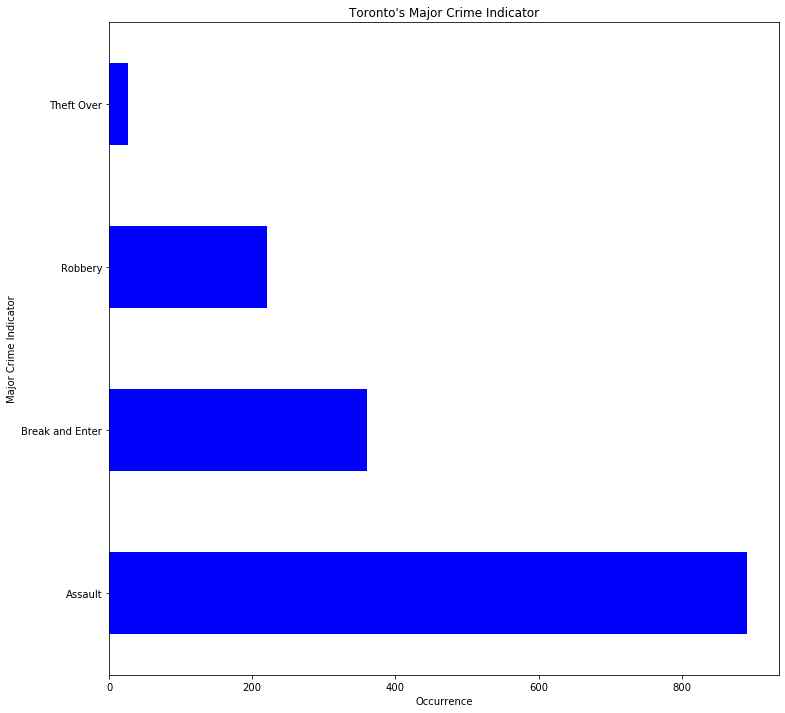

In [64]:
df_mci = crime.groupby(['MCI']).count()

df_mci.plot(kind='barh', figsize=(12,12), color = 'blue',  legend=False)
plt.xlabel('Occurrence')
plt.ylabel('Major Crime Indicator')
plt.title ("Toronto's Major Crime Indicator")

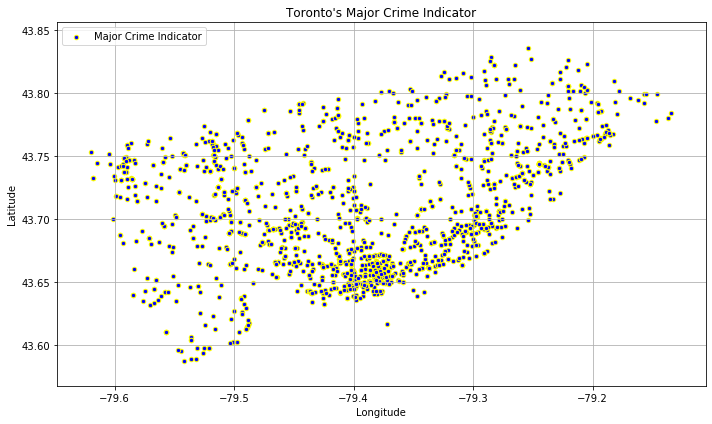

In [65]:
plt.figure(num=None, figsize=(10, 6))
plt.scatter("Long", "Lat", data = crime, c = 'blue', alpha = 1, edgecolor = 'yellow', s=20, label = 'Major Crime Indicator')
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Toronto's Major Crime Indicator")
plt.tight_layout()
plt.axis('tight')
plt.legend(loc=2)

plt.show()


## Locating Major Crime Indicators

In [66]:
from folium import plugins

#instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_toronto)

#loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(crime.Lat, crime.Long, crime.MCI):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)
    
#display map
map_toronto

## Visualizing Resulting Clusters with Superimposed Major Crime Indicators

In [67]:
from folium import plugins

#instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_clusters)

#loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(crime.Lat, crime.Long, crime.MCI):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)
    
#display map
map_clusters